In [1]:
%matplotlib inline
%load_ext autoreload
from glob import glob
from skimage import io
from matplotlib import style
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint as pp
from matplotlib.font_manager import FontProperties
import matplotlib
matplotlib.get_backend()
import joblib as jb
from IPython.display import SVG
#matplotlib.rcParams['backend'] = 'TkAgg' 

In [2]:
%autoreload 2

In [4]:
org_images=pd.read_pickle('old_data_pandas.pickle')
org_images.index=org_images.iloc[:,-1].values

In [14]:
mod_images=pd.read_pickle('new_data_pandas_sorted.pickle')
mod_images.head()

,0,1,2,3,4,5,6,7,8,9,...,2296,2297,2298,2299,2300,2301,2302,2303,label,file_no
0,0.576471,0.584314,0.588235,0.592157,0.603922,0.623529,0.643137,0.658824,0.666667,0.662745,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,0.000000,0.196078,0.556863,0.560784,0.400000,0.247059,0.431373,0.529412,0.623529,0.682353,...,0.0,0.0,0.000000,0.011765,0.129412,0.235294,0.337255,0.364706,0,1
2,0.011765,0.000000,0.137255,0.411765,0.647059,0.729412,0.819608,0.886275,0.878431,0.866667,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,2
3,0.000000,0.000000,0.011765,0.043137,0.094118,0.121569,0.129412,0.180392,0.270588,0.352941,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,4
4,0.439216,0.529412,0.529412,0.509804,0.525490,0.560784,0.568627,0.541176,0.494118,0.396078,...,0.0,0.0,0.003922,0.011765,0.023529,0.031373,0.039216,0.050980,2,5


In [6]:
#label_dict={0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
from __future__ import unicode_literals
label_dict={0:['Angry',u'\U0001f620'],1:['Disgust',u'\U0001f641'],2:['Fear',u'\U0001f628'],\
            3:['Happy',u'\U0001f604'],4:['Sad',u'\U0001f622'],5:['Surprise',u'\U0001f632'],\
            6:['Neutral',u'\U0001f610']}

def print_image(x,ax,data=org_images,cmap='binary'):
    #img1=io.imread(x)
    img=data.iloc[x,:2304].values.reshape(48,-1)
    label=label_dict[data.iloc[x,-2]]
    ax.imshow(img,cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('{} : {}'.format(label[0],label[1]),\
                  color='blue',fontname='DejaVu Sans',fontsize=15)
    ax.set_aspect('equal')
    #return np.array(img11,dtype='int')

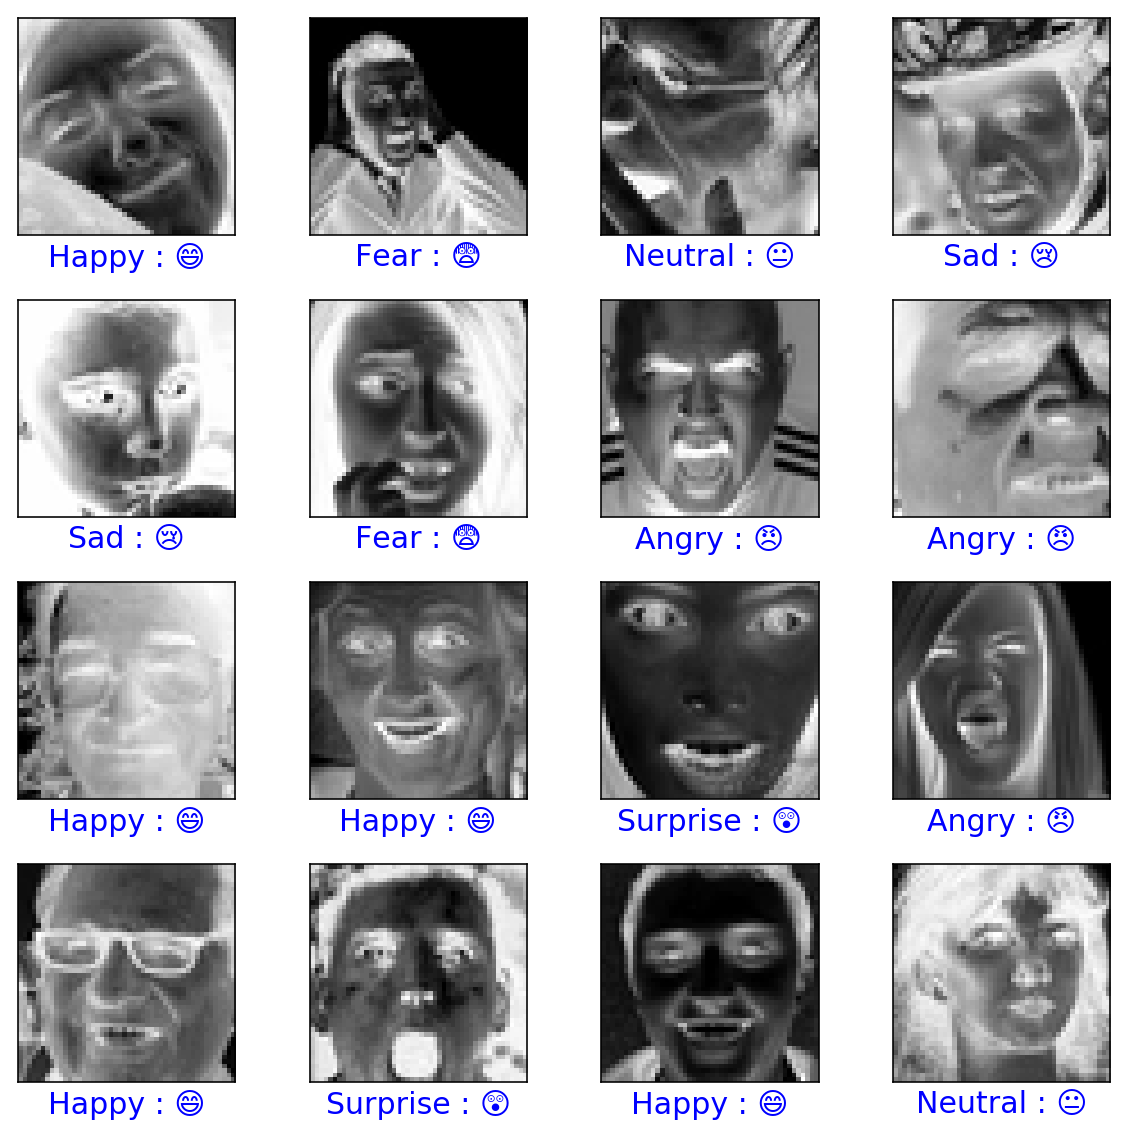

In [8]:
#ed_flist=glob('images1/images1/*')
flist=glob('images1/*')
fig,ax=plt.subplots(4,4,figsize=(8,8))
ax=ax.ravel()
for i in range(16):
    print_image(x=i+16,ax=ax[i])
plt.tight_layout()

fig.subplots_adjust(hspace=0.3,wspace=0.3)
fig.savefig('Images/original_data.png')

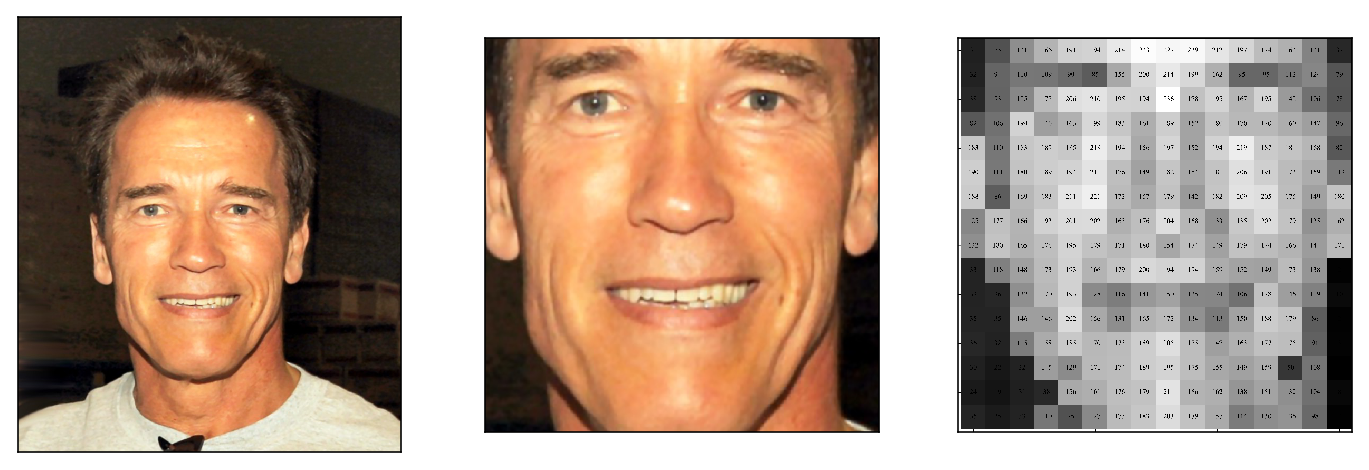

In [12]:
fig,ax=plt.subplots(1,3,figsize=(12,4))
ax=ax.ravel()
file_=['Arnold_.jpg','Arnold_ed.png','face_plot1.png']
for i in range(3):
    ax[i].imshow(io.imread(file_[i]))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
 
# for (j,i),label in np.ndenumerate(img2):
#     ax.imshow(img2,cmap='gray',alpha=0.8)
#     ax.imshow(img2,alpha=0)
#     ax.text(i,j,label,ha='center',va='center',fontsize=8)
# ax.xaxis.set_major_formatter(plt.NullFormatter())
# ax.yaxis.set_major_formatter(plt.NullFormatter())
#fig.savefig('face_plot2.svg')
#plt.close()
plt.savefig('Images/preprocess.jpg')

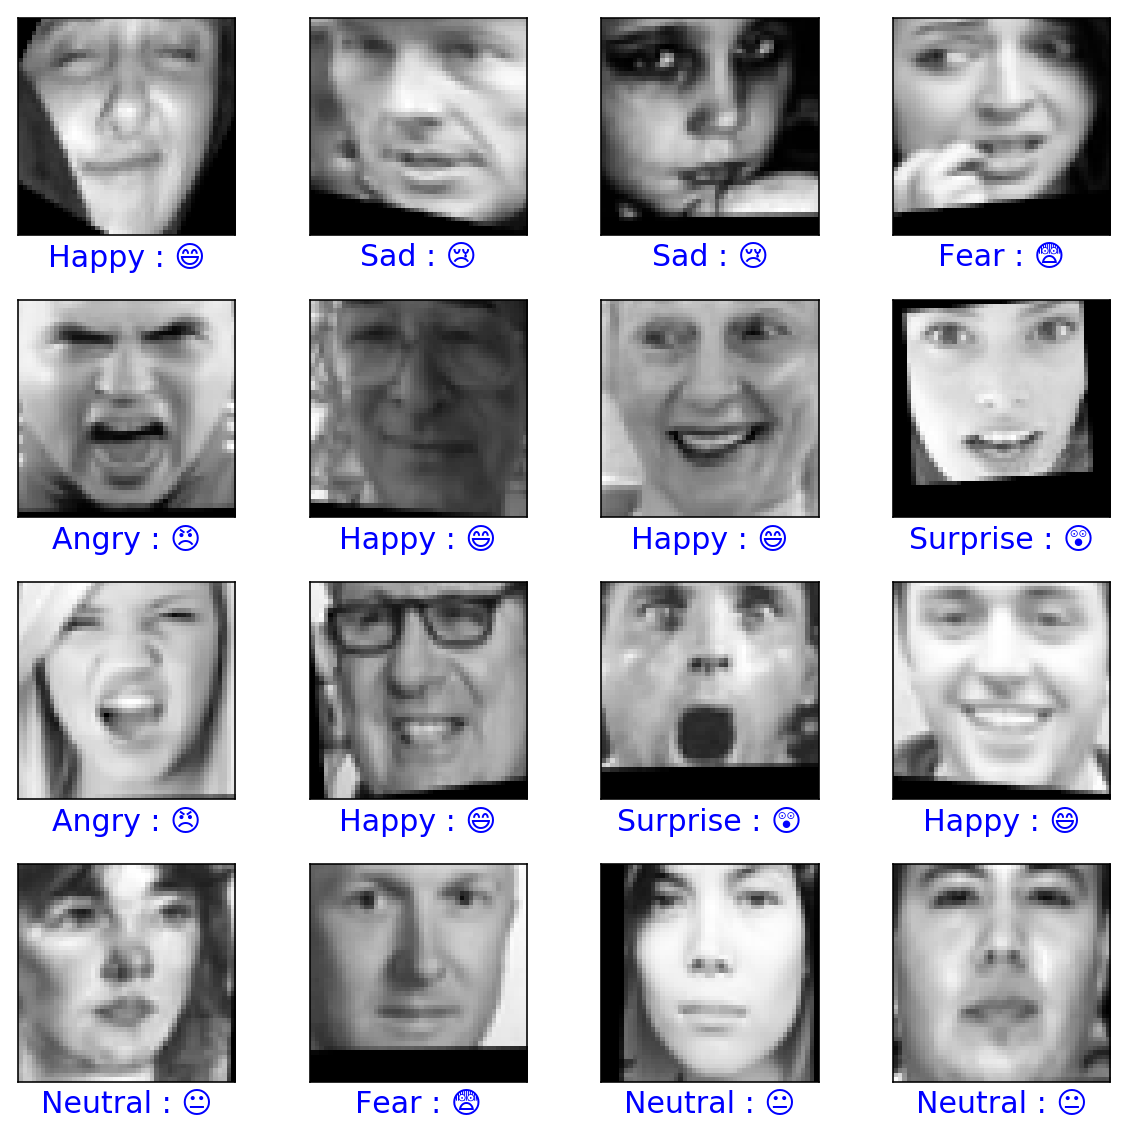

In [64]:
fig,ax=plt.subplots(4,4,figsize=(8,8))
ax=ax.ravel()
for i in range(16):
    print_image(x=i+13,ax=ax[i],data=mod_images)
plt.tight_layout()

fig.subplots_adjust(hspace=0.3,wspace=0.3)

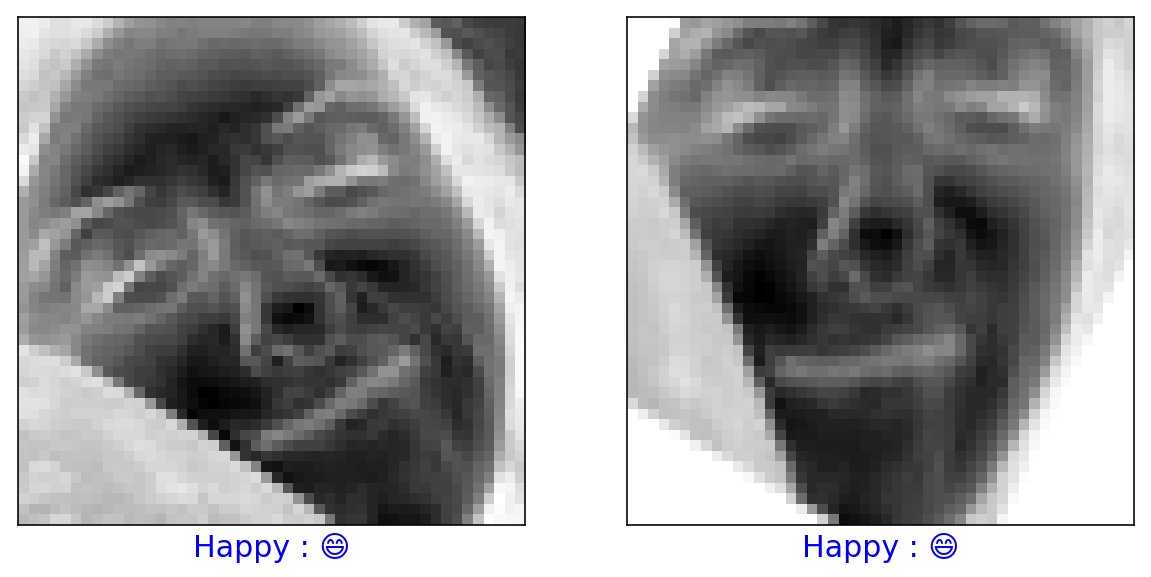

In [17]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax=ax.ravel()
print_image(x=16,ax=ax[0])
print_image(x=13,ax=ax[1],data=mod_images)
fig.savefig('Images/rotation.png')